# Demo
```
Retele neuronale convolutionale
==> utilizate pt. extragerea pattern-urilor din imagini
==> recunoastera si clasificarea imaginilor

```

*  vom folosi setul de date oferit de TensorFlow (CIFAR10 =6.000 img, 10 clase)
```
tensorul foloseste: inaltimea, latimea, culoarea==> se detecteaza pattern-ul


In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

import matplotlib.pyplot as plt

# Preluare date din setul de date
* din 60.000 de imagini=> 50.000=train, 10.000=test

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 11s 0us/step


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


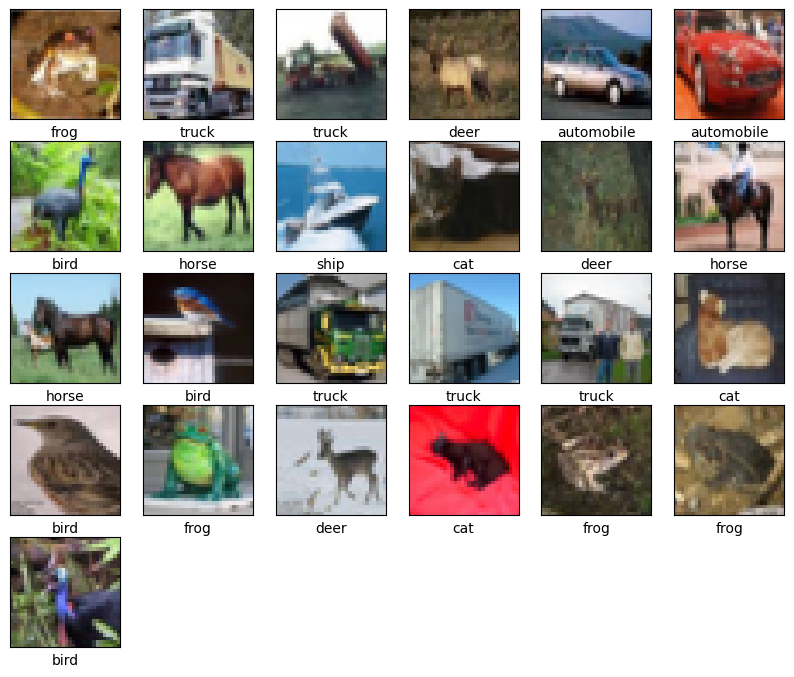

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Reteaua elemente:**

5 layers, pentru fiecare, se va folosi o functie de activare (ex: relu)

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

# Este necesar ca pt. ultimul nivel, sa transformam output-ul de forma (4, 4, 64), in unul in care obtinem un tensor 1D

* se aplatizeaza iesirea (de la 3D, la 1D)
* se adauga dense layer
* layer-ul de final este necesar sa aiba 10 straturi = nr de obiecte clasificate

In [20]:
# aplatizam modelul (3D->1D)
model.add(layers.Flatten())
# se adauga layere dense
model.add(layers.Dense(64, activation='relu'))
# output
model.add(layers.Dense(10))

Antrenare si verificare
* 3 epoci

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))

Epoch 1/3
1563/1563 [==============================] - 84s 53ms/step - loss: 0.9416 - accuracy: 0.6691 - val_loss: 0.9538 - val_accuracy: 0.6685
Epoch 2/3
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8654 - accuracy: 0.6949 - val_loss: 0.9052 - val_accuracy: 0.6865
Epoch 3/3
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7982 - accuracy: 0.7203 - val_loss: 0.8636 - val_accuracy: 0.7019


In [23]:
predictions = model.predict(test_images)

313/313 [==============================] - 5s 14ms/step


In [28]:
score = tf.nn.softmax(predictions[0])
print(f'{np.max(score)}')

0.7378413


Biblio:

https://www.tensorflow.org/tutorials/images/cnn
